# TNSE with SHAP

#### Import libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
from numpy import loadtxt
from numpy import concatenate
from numpy import array
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

#### Load data

In [5]:
php_shap = loadtxt('../data/php-low-shap.csv', delimiter=',')
ruby_shap = loadtxt('../data/ruby-low-shap.csv', delimiter=',')
c_shap = loadtxt('../data/c-low-shap.csv', delimiter=',')
py_shap = loadtxt('../data/python-low-shap.csv', delimiter=',')
scala_shap = loadtxt('../data/scala-low-shap.csv', delimiter=',')
java_shap = loadtxt('../data/java-low-shap.csv', delimiter=',')

In [6]:
#php_shap = loadtxt('../data/PHP-shap.csv', delimiter=',')
#ruby_shap = loadtxt('../data/ruby-shap.csv', delimiter=',')
#c_shap = loadtxt('../data/c-shap.csv', delimiter=',')
#py_shap = loadtxt('../data/python-shap.csv', delimiter=',')
#scala_shap = loadtxt('../data/scala-shap.csv', delimiter=',')
#java_shap = loadtxt('../data/java-shap.csv', delimiter=',')

In [7]:
#php_shap = loadtxt('../data/php-shap-2.csv', delimiter=',')
#ruby_shap = loadtxt('../data/ruby-shap-2.csv', delimiter=',')
#c_shap = loadtxt('../data/c-shap-2.csv', delimiter=',')
#py_shap = loadtxt('../data/python-shap-2.csv', delimiter=',')
#r_shap = loadtxt('../data/r-shap-2.csv', delimiter=',')
#java_shap = loadtxt('../data/java-shap-2.csv', delimiter=',')

In [8]:
ruby_shap.shape

(44,)

#### Preparing data

In [9]:
# x and y lists (features and target)
x = []
aux = []

In [10]:
x.append(php_shap)
x.append(ruby_shap)
x.append(c_shap)
x.append(py_shap)
x.append(scala_shap)
x.append(java_shap)

In [11]:
aux.append(0)
aux.append(1)
aux.append(2)
aux.append(3)
aux.append(4)
aux.append(5)

y = array(aux)

#### TNSE

In [12]:
classes = ['PHP', 'Ruby', 'C', 'Python', 'Scala', 'Java']

tsne = TSNE(n_components=3, 
            init='pca', 
            verbose=1, 
            perplexity=50, 
            n_iter=500,
            random_state=0)

In [13]:
X_2d = tsne.fit_transform(x)

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.000s...
[t-SNE] Computed neighbors for 6 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 64.783875
[t-SNE] KL divergence after 100 iterations: 2.913750


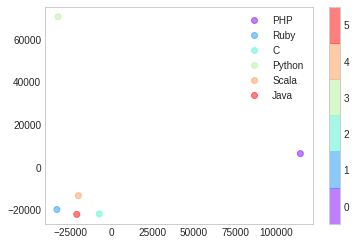

In [14]:
# plot the result
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
scatter = plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 6),alpha=0.5)
plt.colorbar(ticks=range(6))
plt.clim(-0.5, 5.5)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.savefig('../reports/languages-tnse.png')
plt.show()

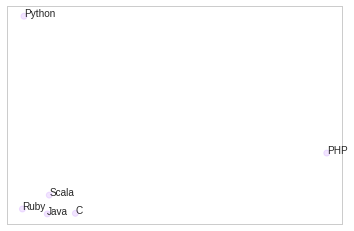

In [15]:
# plot the result
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 1),alpha=0.1)
plt.xticks([])
plt.yticks([])
for i, txt in enumerate(classes):
    plt.annotate(txt, (vis_x[i], vis_y[i]))
plt.savefig('../reports/languages-tnse.png')
plt.show()

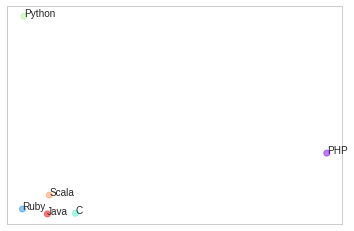

In [16]:
fig, ax = plt.subplots(1)
ax.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 6),alpha=0.5)
ax.set_xticks([])
ax.set_yticks([])
for i, txt in enumerate(classes):
    ax.annotate(txt, (vis_x[i], vis_y[i]))
# And a corresponding grid
ax.grid(which='both')

#### That's all folks!!!